The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.\

1- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS \
2- alpha = Right Ascension angle (at J2000 epoch)\
3- delta = Declination angle (at J2000 epoch)\
4- u = Ultraviolet filter in the photometric system\
5- g = Green filter in the photometric system\
6- r = Red filter in the photometric system\
7- i = Near Infrared filter in the photometric system\
8- z = Infrared filter in the photometric system\
9- run_ID = Run Number used to identify the specific scan\
10- rerun_ID = Rerun Number to specify how the image was processed\
11- cam_col = Camera column to identify the scanline within the run\
12- field_ID = Field number to identify each field\
13- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same\
14- spec_obj_ID must share the output class)\
15- class = object class (galaxy, star or quasar object)\
16- redshift = redshift value based on the increase in wavelength\
17- plate = plate ID, identifies each plate in SDSS\
18- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken\
19- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation\

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [31]:
for c in df.columns:
    print(f"{c:15}: {df[c].unique().shape[0]}")

obj_ID         : 78053
alpha          : 99999
delta          : 99999
u              : 93748
g              : 92651
r              : 91901
i              : 92019
z              : 92007
run_ID         : 430
rerun_ID       : 1
cam_col        : 6
field_ID       : 856
spec_obj_ID    : 100000
class          : 3
redshift       : 99295
plate          : 6284
MJD            : 2180
fiber_ID       : 1000


In [32]:
df.drop(['obj_ID', 'spec_obj_ID', 'rerun_ID'], axis=1, inplace=True)

In [33]:
df.describe()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,3.511610,186.130520,0.576661,5137.009660,55588.647500,449.312740
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,1.586912,149.011073,0.730707,2952.303351,1808.484233,272.498404
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,1.000000,11.000000,-0.009971,266.000000,51608.000000,1.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,2.000000,82.000000,0.054517,2526.000000,54234.000000,221.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,4.000000,146.000000,0.424173,4987.000000,55868.500000,433.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,5.000000,241.000000,0.704154,7400.250000,56777.000000,645.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,6.000000,989.000000,7.011245,12547.000000,58932.000000,1000.000000


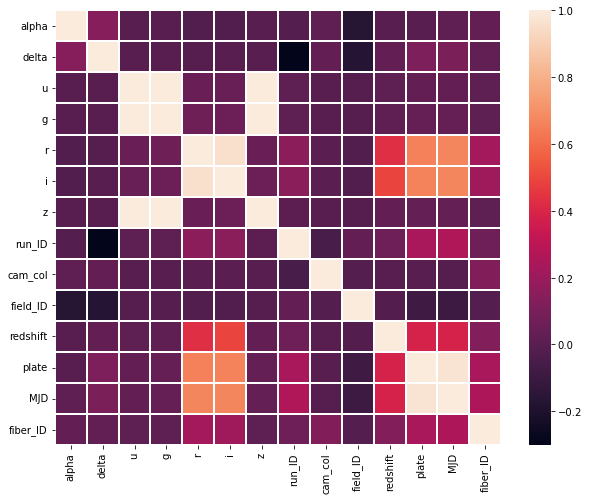

In [34]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), linewidths=1)

In [35]:
X = df.drop('class', axis=1)
y = df['class']

In [59]:
y.replace({c:i for i,c in enumerate(y.unique())}, inplace=True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [38]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [39]:
df_scaled.head()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.434248,0.2,0.069530,0.091831,0.451592,0.648007,0.170170
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.547498,0.8,0.110429,0.112389,0.828841,0.894320,0.426426
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.434248,0.2,0.111452,0.093170,0.350949,0.543965,0.298298
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.507016,0.4,0.207566,0.134210,0.723312,0.878072,0.774775
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.992549,0.4,0.128834,0.017959,0.476753,0.625205,0.841842


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_test.shape

((80000, 14), (20000, 14))

In [42]:
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

In [49]:
model = LinearSVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_linearSVC = metrics.accuracy_score(y_test, pred)
print(acc_linearSVC)

In [16]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_SVC = metrics.accuracy_score(y_test, pred)
print(acc_SVC)

[LibSVM]0.593


In [43]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, pred)
print(acc_knn)

0.70275


In [62]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [60]:
new_y_train = to_categorical(np.array(y_train))
new_y_test = to_categorical(np.array(y_test))

In [63]:
model = Sequential()

# model.add(Input(X_train.shape))
model.add(Dense(32))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(3, activation='softmax'))

opt = Adam(learning_rate=1e-2)

callbacks = [
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.1,
        patience=3,
        min_delta=0.001,
        min_lr=1e-4
)
]

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    X_train, new_y_train, 
    batch_size=32, 
    validation_data=(X_test, new_y_test), 
    epochs=100,
    callbacks=callbacks
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2472/2500 [============================>.] - ETA: 0s - loss: 668.7506 - accuracy: 0.4661WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f1be405ca60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 864x432 with 0 Axes>

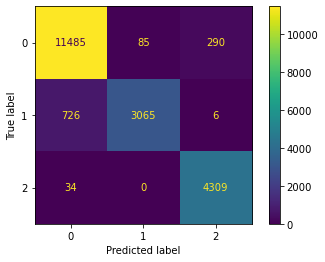

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, [np.argmax(a) for a in model.predict(X_test)]))
disp.plot()